<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>ЦПТ для различных распределений</strong></a></span></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></div>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import itertools
import seaborn as sns
import statsmodels.stats.weightstats as ssw
%matplotlib inline

###   **ЦПТ для различных распределений**

Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

Сгенерируйте примеры из распределения

In [142]:
laplace_rv = sts.laplace()
sample = laplace_rv.rvs(100)
sample

array([ 0.0816952 , -0.42867816, -1.22408099, -1.14024669, -1.35160438,
        0.17179093, -1.68999557,  1.72086929, -1.79610794,  0.91818484,
        1.40348907, -1.67708038, -0.15945098, -0.05504628,  0.1748228 ,
        0.566494  , -2.9162195 ,  0.62137491,  0.76341303, -3.93565653,
       -0.48357963, -0.76414719,  0.00687846,  2.37992803,  0.12287139,
       -1.63507691,  0.27886371,  1.29479227, -1.15434315,  4.19035206,
       -1.77194428, -1.66645372,  0.310904  ,  2.28863235,  2.06745722,
       -0.11120357,  0.60769027,  0.66257133, -0.48780577, -1.4290236 ,
       -0.11905683, -0.24392214,  0.06581758,  1.17349327,  0.07531541,
        0.44713168,  0.24635481, -1.62477489, -1.69251972, -2.1898668 ,
       -1.75408815, -0.74581703,  1.13639495,  0.04577284,  0.02649771,
        0.35619498,  0.09341191, -2.73443641,  0.17471468,  0.78127503,
       -0.28441655, -0.01811358,  3.30441631, -0.7147737 , -0.28948851,
       -2.3933933 , -0.47781763,  1.08778749,  0.95203624,  0.32

In [143]:
sample.dtype

dtype('float64')

In [144]:
real_mean = laplace_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [145]:
real_var = laplace_rv.var() # настоящая дисперсия случайной величины
real_var

2.0

Построим гистограмму выборки и теоретическую плотность распределения


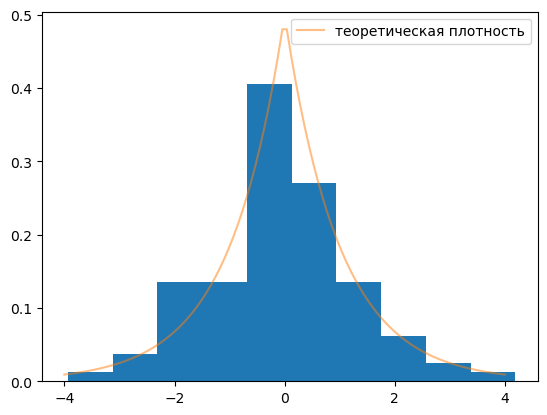

In [146]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

Из графика видно, что получившаяся гистограмма относительно совпадает с функцией плотности вероятности нашего распределения. Такой результат мы и ожидали увидеть


In [147]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.027444776899738402
1.7178528298689075


Оценим распределение выборочного среднего для разных объёмов выборок

Для этого построим на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используем настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

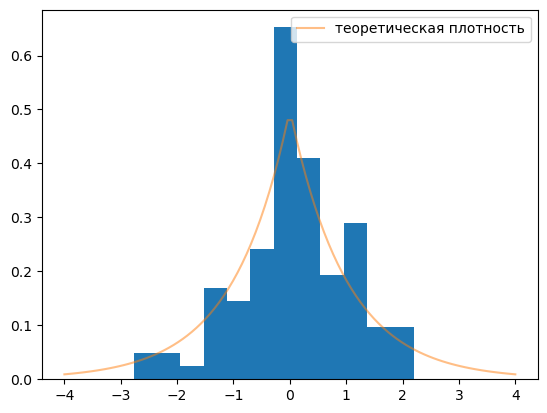

In [148]:
p=.1
laplace_rv = sts.laplace(p)
laplace_rv.rvs(20)
N = 2
NN = 100

# сгенерируем 100 выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(laplace_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

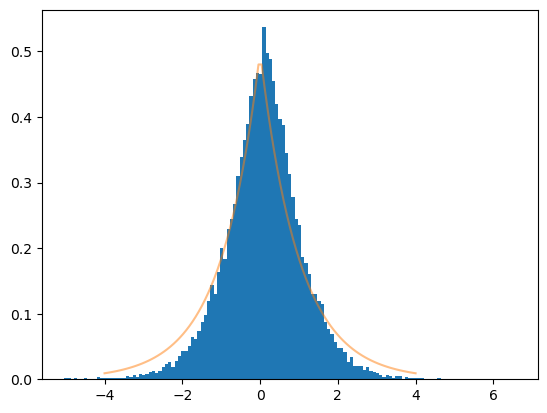

In [149]:
p=.1
laplace_rv = sts.laplace(p)
laplace_rv.rvs(20)
N = 2
NN = 20000

# сгенерируем 20 000 выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(laplace_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)

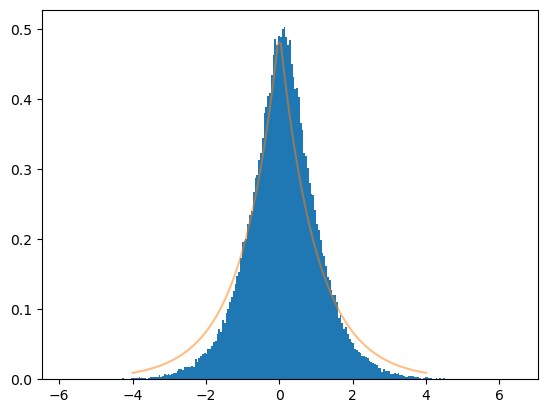

In [150]:
p=.1
laplace_rv = sts.laplace(p)
laplace_rv.rvs(20)
N = 2
NN = 100000

# сгенерируем 100 000 выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(laplace_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)

ВЫВОД: Чем больше  размер генерируемой выборки, тем точнее получаем распределение выборочного среднего

### Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [151]:
df=pd.read_csv('telecom_churn.csv')
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [152]:
df.shape

(3333, 21)

Посмотрим на churn:

In [153]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

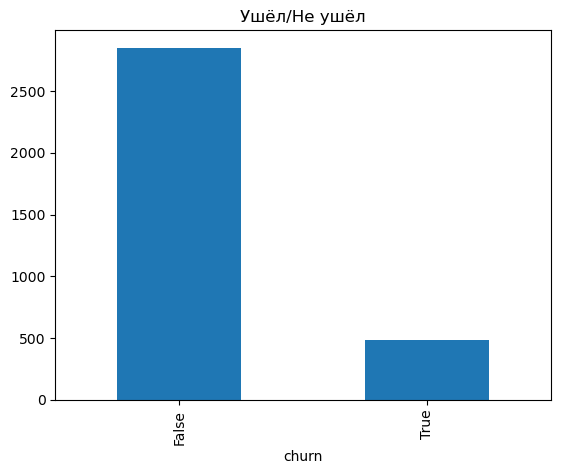

In [155]:
df['churn'].value_counts().plot(kind='bar')
plt.title('Ушёл/Не ушёл');

Теперь посмотрим на распределение total day calls тех абонентов, которые "не ушли":

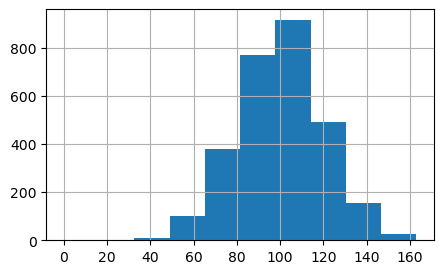

In [156]:
df.query('churn==False')['total day calls'].hist(figsize=(5,3));

In [195]:
len(df.query('churn==False')['total day calls'])

2850

Видим, что total day calls распределен нормально. 

In [189]:
#Выберем тех клиентов, которые "не ушли"
      
data = df.query('churn==False')['total day calls']\
         .sort_values()\
         .reset_index(drop= True)

#Стандартное отклонение:
sto=np.std(data,ddof=1)

#Среднее значение:
loc=np.mean(data)

scale=(np.std(data, ddof=1)/np.sqrt(len(data)-1))

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    loc - 1.96 * sto / np.sqrt(len(data)-1), loc + 1.96 * sto / np.sqrt(len(data)-1) 
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(loc,  sto, alpha=0.95, alternative='two-sided')
))                      

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.5560474002651, 101.01026838920859] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274121, 101.52482464673248) 


Теперь рассмотрим абонентов, которые "ушли":

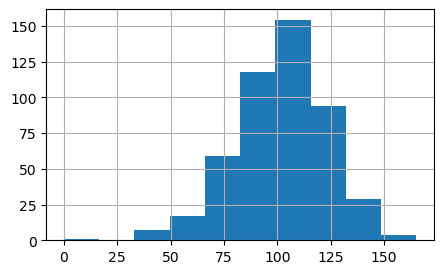

In [175]:
df.query('churn==True')['total day calls'].hist(figsize=(5,3));

In [194]:
#Выберем тех клиентов, которые "ушли"
      
data = df.query('churn==True')['total day calls']\
         .sort_values()\
         .reset_index(drop= True)

#Стандартное отклонение:
sto=np.std(data,ddof=1)

#Среднее значение:
loc=np.mean(data)

print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    loc - 1.96 * sto/ np.sqrt(len(data)-1), loc + 1.96 * sto/ np.sqrt(len(data)-1) 
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(loc,  sto, alpha=0.95, alternative='two-sided')
))                      

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.40863130099714, 103.26217615241902] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


1. На более объёмной выборке (для тех абонентов, которые "не ушли") результат построение доверительного интервала методом _zconfint_generic менее точный, чем результат с известной дисперсией.
2. На менее объёмной выборке (для тех абонентов, которые "ушли") результат построение доверительного интервала методом _zconfint_generic более точный, чем результат с известной дисперсией.

Значит для использования метода построения интервала с известной дисперсией нужна выборка бОльшего объёма для лучшего результата, иначе при небольшой выборке лучше пользоваться функцией _zconfint_generic